In [40]:
%reload_ext autoreload
%autoreload 2

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

from manoFunkcijos import SolarAnalyzer

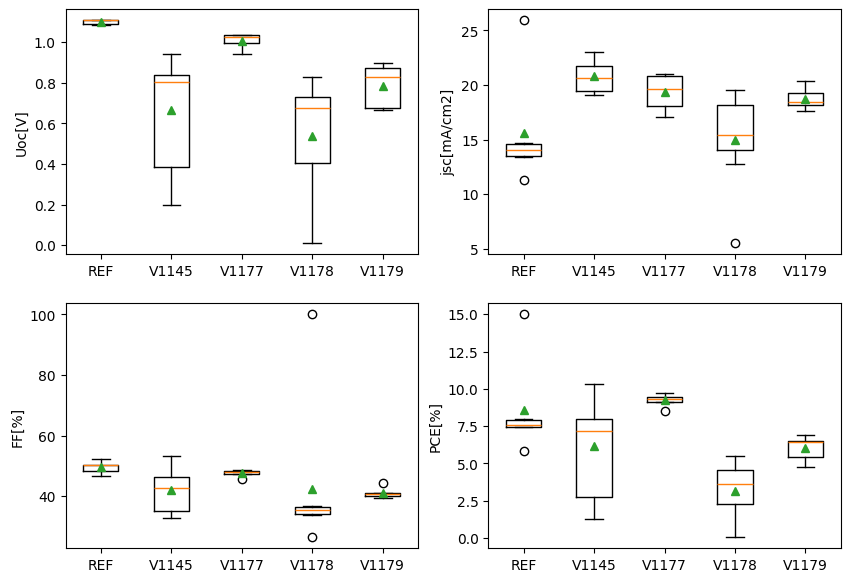

In [48]:
dat_failai = glob.glob('../../DATA/OOP_DATA/*.dat')


medziag = []

for i in dat_failai:
    a=SolarAnalyzer(i)
    medziag.append(a.MedziagosPavadinimas())
   
medziag=sorted(list(set(medziag)))

UOCd = dict.fromkeys(medziag, None)
for i in UOCd.keys():
    UOCd[i] = []

JSCd = dict.fromkeys(medziag, None)
for i in JSCd.keys():
    JSCd[i] = []

FFd = dict.fromkeys(medziag, None)
for i in FFd.keys():
    FFd[i] = []

PCEd = dict.fromkeys(medziag, None)
for i in PCEd.keys():
    PCEd[i] = []
    
for i in dat_failai:
    a=SolarAnalyzer(i)
    med=a.MedziagosPavadinimas()
    UOCd[med].append(a.uoc())
    JSCd[med].append(a.jsc())
    PCEd[med].append(a.pce())
    FFd[med].append(a.ff())
      
fig, axis = plt.subplots(2,2, figsize=(10, 7))

axis[0][0].boxplot(UOCd.values(), showmeans=True)
axis[0][0].set_xticklabels(UOCd.keys())
axis[0][0].set_ylabel('Uoc[V]')
axis[0][1].boxplot(JSCd.values(), showmeans=True)
axis[0][1].set_xticklabels(medziag)
axis[0][1].set_ylabel('jsc[mA/cm2]')
axis[1][0].boxplot(FFd.values(), showmeans=True)
axis[1][0].set_xticklabels(medziag)
axis[1][0].set_ylabel('FF[%]')
axis[1][1].boxplot(PCEd.values(), showmeans=True)
axis[1][1].set_xticklabels(medziag)
axis[1][1].set_ylabel('PCE[%]')

plt.show()